# Imports

In [3]:
import nltk
import pandas as pd
from git_root import git_root
import matplotlib.pyplot as plt

In [4]:
my_git_root = git_root()

In [5]:
df_extracted_path = f'{my_git_root}/data/mineru.csv'
df_extracted = pd.read_csv(df_extracted_path)

In [6]:
df_extracted

,name,text
0,aalto-university.md,# Aalto University Research Data Management Po...
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...
4,brunel-university-london.md,# runel University Research Data Management Po...
...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...
138,universität-siegen.md,# Research-Data-Policy of the University of Si...
139,universität-stuttgart.md,# Research data management policy of the Unive...
140,utrecht-university.md,# University policy framework for research dat...


In [7]:
texts = df_extracted['text'].to_list()

In [8]:
my_text = texts[0]
len(my_text)

9047

In [9]:
text_len = [len(text) for text in texts]

words = []
for text in texts:
    words.append(len(text.split()))

num_sents = []
for text in texts:
    sents = nltk.sent_tokenize(text)
    num_sents.append(len(sents))

df_extracted['text_len'] = text_len
df_extracted['words'] = words
df_extracted['num_sents'] = num_sents

In [10]:
df_extracted

,name,text,text_len,words,num_sents
0,aalto-university.md,# Aalto University Research Data Management Po...,9047,1207,53
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...,4658,618,36
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...,15546,2129,85
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...,32890,4973,173
4,brunel-university-london.md,# runel University Research Data Management Po...,12611,1812,97
...,...,...,...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...,6966,1035,45
138,universität-siegen.md,# Research-Data-Policy of the University of Si...,2024,279,3
139,universität-stuttgart.md,# Research data management policy of the Unive...,3163,443,22
140,utrecht-university.md,# University policy framework for research dat...,12508,1837,76


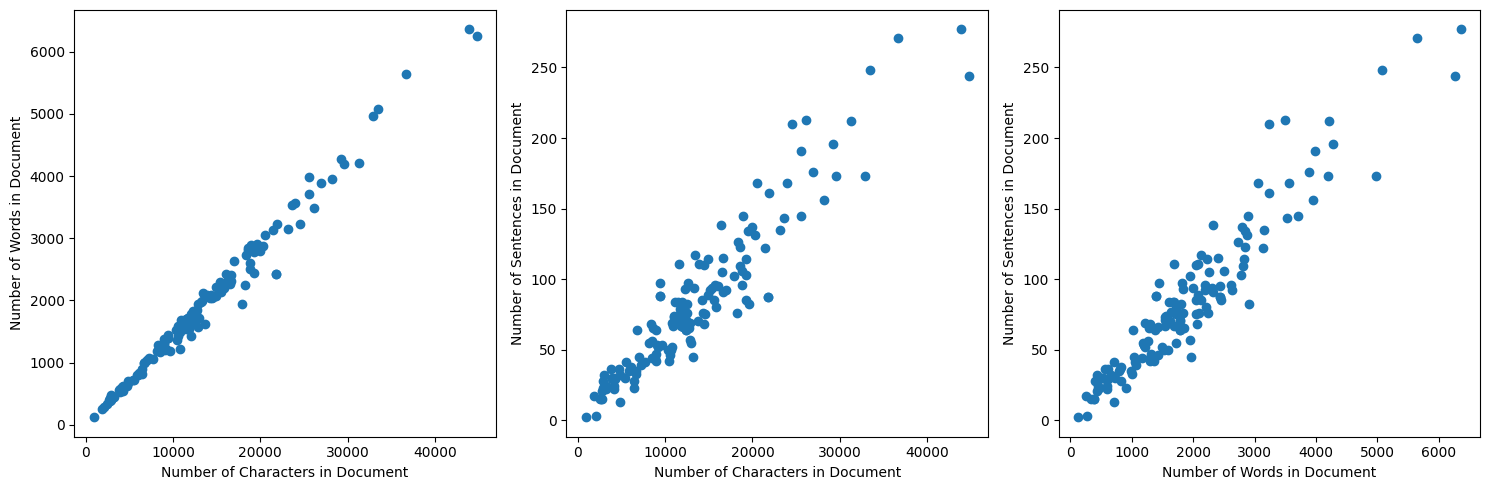

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(text_len, words)
ax[0].set_xlabel('Number of Characters in Document')
ax[0].set_ylabel('Number of Words in Document')

ax[1].scatter(text_len, num_sents)
ax[1].set_xlabel('Number of Characters in Document')
ax[1].set_ylabel('Number of Sentences in Document')

ax[2].scatter(words, num_sents)
ax[2].set_xlabel('Number of Words in Document')
ax[2].set_ylabel('Number of Sentences in Document')

plt.tight_layout()
plt.savefig(f'{my_git_root}/notebooks/images/len_words_sents.svg')

Find headings

In [14]:
import re

for text in texts:
    re.search(r'\s*#+\s*', text)

In [22]:
matches = re.findall(r'#+', text)
len(matches)

19

In [26]:
for item in re.split(r'\s*#+\s*', text):
    print(item)
    print('-'*50)




--------------------------------------------------
Research Data Management Policy 2024  

Approved 11th July 2024, Academic Board: 23.116.5
--------------------------------------------------
Contents  

Introduction…   
Purpose…   
Scope 2 Definitions .. 3 Principles . 3 Collection . 3 Ownership. 3 Organisation and Technical Measures . 3 Data Management Plans and Data Protection Impact Assessments 3 Storage ..... 5 Data Sharing . 5 Transferring Data Outside the EU 6 Retention ... 6 Disposal ..   
Access ....   
FAIR Data .   
Reporting a Data Incident/Breach . 8 Other Polices, Procedures, Legislation .. 8 Wrexham University Policy and Procedure 8 Legislation. 8
--------------------------------------------------
Introduction  

Wrexham University is committed to maintaining the highest standards of ethics, rigour, and integrity in all its research. It seeks to protect the dignity, rights, and welfare of all those involved in the research it produces. The University recognises its duty

In [24]:
from IPython.display import display, Markdown

display(Markdown(text))

# Research Data Management Policy 2024  

Approved 11th July 2024, Academic Board: 23.116.5  

# Contents  

Introduction…   
Purpose…   
Scope 2 Definitions .. 3 Principles . 3 Collection . 3 Ownership. 3 Organisation and Technical Measures . 3 Data Management Plans and Data Protection Impact Assessments 3 Storage ..... 5 Data Sharing . 5 Transferring Data Outside the EU 6 Retention ... 6 Disposal ..   
Access ....   
FAIR Data .   
Reporting a Data Incident/Breach . 8 Other Polices, Procedures, Legislation .. 8 Wrexham University Policy and Procedure 8 Legislation. 8  

# Introduction  

Wrexham University is committed to maintaining the highest standards of ethics, rigour, and integrity in all its research. It seeks to protect the dignity, rights, and welfare of all those involved in the research it produces. The University recognises its duty to safeguard the confidentiality of personal research data in keeping with its responsibilities under the Data Protection Act 2018 and the General Data Protection Regulation 2018 (UK GDPR). This legislation defines the University's responsibility to ensure appropriate organisational and technical measures are in place to protect personal data.  

Any research project collecting data from a human participant or collecting or processing personal data must have formal ethical approval from the University and comply with the University's Data Protection and Data Disposal Policy.  

The University recognises research data as a valued asset. It identifies the maintenance of accurate and retrievable data from the research community as best practice, acknowledging that sharing research data is crucial to the impact, visibility, transparency, trust, and knowledge transfer of the University's research.  

Wrexham University supports the UKRI Common Principles on Research Data, acknowledging that publicly funded research data are a public good, produced in the public interest for societal benefit and, where possible, be made openly available with a few restrictions as possible in a timely and responsible manner.  

# Purpose  

This Policy sets out the principles that should be followed by staff and students at Wrexham University when processing research data throughout the research lifecycle. The Policy promotes good practice in research data management, fostering responsibility for preparing Research Data Plans and ensuring research data is stored, retained, accessed, and disposed of securely, complying with legal and ethical obligations, University policy and, where applicable, the requirements of funding bodies.  

The Policy defines the individual and institutional responsibilities that the individual and institutional levels that should guide the work of those involved in research data collection, curation, storage, and maintenance. It sets out the basis on which University staff and students will process any personal data collected from data subjects in the course of conducting research or that is provided to those conducting research by data subjects or other sources for the same.  

# Scope  

This Policy applies to all staff and students at Wrexham University engaged in research, whether or not the research is funded and whether or not the data collected includes collecting or processing personal data. The Policy covers all data collected during a research study and all members of the University involved in the creation, collection, and curation of research data under the auspices of the University, including sessional, visiting or emeritus, associates, honorary, contractors, consultants, or volunteers.  

# Definitions  

For the purpose of this Policy, research data are defined as that which is collected, observed, or created for the purpose of analysing and producing original research results. Such research data are the recorded information, regardless of the form or the media in which they may exist, necessary to support or validate a research project's observations, findings or outputs. In practice, the nature of research data can vary widely depending on the discipline. It can be textual, numerical, qualitative, quantitative, final, preliminary, physical, digital or print. Research data comes in many formats, including word-processed documents, PDFs, spreadsheets, scanned lab books, online surveys, digital recordings, databases or computer software.  

# Principles  

# Collection  

Research data must be collected responsibly, using the correct methods and techniques to protect the integrity of your data.  Research data must be collected in accordance with the ethical approval of a research project and the legal obligations of the Data Protection Act 2018.  

# Ownership  

For research carried out under a grant or contract or involving collaboration with another institution or external party, the agreement's terms will determine the data's ownership and rights. It is recommended that any contract with an external party identify the process for Research Data Management in conjunction with the principles of this Policy.  

Where no external contract and no intellectual property rights exist, the University owns the data generated during research undertaken under the auspices of the University by staff members in its employment and postgraduate research students. Where taught students generate data under the supervision of a staff member as part of a funded project the data will be owned by the University or in accordance with the terms of the contract.  

# Organisation and Technical Measures  

The University Research Ethics Policy sets out the ethical review and approval process to ensure that the University research is carried out in the public interest and is lawful under the UK GDPR and Data Protection Act. All staff and students conducting research within the scope of the Research Ethics Policy must seek ethical approval before data collection and processing commence.  

Data Management Plans and Data Protection Impact Assessments Data Management Plans (DMP) should be completed before the commencement of all research projects. The DMP should address the type, volume, storage, confidentiality, retention, sharing, deposit, reuse, and integrity of the data throughout the project lifecycle. The Principal Investigator or Supervisor is responsible for creating and owning a research data management plan and ensuring the full research team and collaborators are aware of and adhere to it.  

Many funders require researchers to submit a data management plan as part of the application process. Researchers should respect the data management policies of the funder(s) and other external parties. Many public funders of research, including all the UK Research Councils, accept that the management of research data is a legitimate research expense.  

Research projects requiring ethical approval should use the data management plan provided in the online ethical approval application form. Projects not requiring ethical approval should complete the Wrexham University Data Management Plan Template. When preparing an application, researchers applying for funding should consider the terms and requirements listed in the funder policy documents. Researchers can access DMPOnline to view the data management plan templates based on the requirements listed in the funder policy documents.  

The UK GDPR creates a legal obligation to think about and mitigate data protection issues and privacy concerns at the project planning stage before any data is gathered. A Date Protection Impact Assessment (DPIA) is an assessment to help researchers identify any potential risks a project might have as regards intruding into participants' privacy. The DPIA then assists with implementing appropriate measures and controls to minimise and manage those risks. The legislation has made DPIAs mandatory for higher-risk data processing to ensure that privacy and data protection are key considerations from the start of any project and then taken into account throughout the project's lifecycle.  

The European Commission (DG Research and Innovation) recommends that a DPIA be carried out for data processing operations that may entail higher ethical risks, such as:  

<html><body><table><tr><td>TypesofPersonal Data</td><td>Racial or ethnic origin Political opinions, religious or philosophical beliefs Genetic, biometric or health data Sex Life or sexual orientation Trade Union membership</td></tr><tr><td>Data Subjects</td><td>Children Vulnerable people People who have not given their explicit consent to participate in theproject</td></tr><tr><td>Scale or complexity of data Processing</td><td>Large scale processing of personal data Systematicmonitoringof a publicly accessiblearea onalarge scale Involvement of multiple datasets and/or service providers or the combination and analysis of different datasets (big data)</td></tr><tr><td>Data-collection or processing Techniques</td><td>Privacy-invasive methods or technologies (the covert observation, surveillance, tracking or deception of individuals) Using camera systems to monitor behaviour or record sensitiveinformation.</td></tr></table></body></html>  

<html><body><table><tr><td></td><td>Datamining(includingdatacollectedfromsocial medianetworks)webcrawlingorsocialnetwork analysis. Profiling individuals or groups (particular behavioural orpsychological profiling) Usingartificialintelligencetoanalysepersonaldata Using automated decision-making that has a significantimpact on the data subject(s)</td></tr><tr><td>InvolvementofnonEu- countries</td><td>Transfer ofpersonal datatonon-EUcountries CollectionofpersonaldataoutsidetheEU</td></tr></table></body></html>  

A DPIA screening is included in the Research Ethics Committee approval process. However, some funders will require a separate DPIA, which should be completed using the University Data Protection Impact Assessment Template or one provided by the funder if that is specified. In cases where a research project does not require ethical review, researchers must still complete a DPIA screening and, if necessary, a full assessment, which must be authorised by the Data Protection Officer.  

The University mandates that a Data Protection Impact Assessment (DPIA) is completed prior to the commencement of a research project that is likely to result in high risk to individuals. The DPIA process is a legal requirement and an important tool to help you identify and minimise the data protection risks of a project involving personal data processing. Researchers should refer to the ICO for further information on the definition of high-risk data processing and the Wrexham University Data Protection Impact Assessment template and guidance document.  

# Storage  

All research data must be stored in a university-managed environment throughout the project's lifecycle. A university approved environment protects research data against a data breach, data loss and corruption, and unauthorised access and guarantees the security and integrity of research data and participant information. The University recommends that research data collected by staff or students be stored on the University's private drive (Z drive), shared drive (Y drive), or cloud-based University (Teams and OneDrive). Physical research data should be stored on the University premises in a secure environment at all times. Researcher working remotely should refer to the principles and guidance outlined in the University Remote and Mobile Working Policy  

# Data Sharing  

Where proposed research projects involve collaboration with third parties (e.g another university, NHS Trust or other external partners) and the sharing of personal data, special category data, criminal convictions or offences data or pseudonymised data is anticipated, an appropriate contract or data sharing agreement must be put in place before any data is exchanged.  

Data Sharing Agreements set out the framework for the sharing of personal data and documents, the purpose of the sharing, covers what happens to the data at each stage and puts in place standards that help all the parties involved in the sharing to be clear about their roles and responsibilities.  

A ‘Data Sharing Agreement' is required where the University and the other party are both Data Controllers or Joint Controllers and intend on sharing personal information routinely and regularly between themselves. A 'Data Processing Agreement' is required when the University is the data controller and contracts an outside company to undertake a task that involves the processing of personal data on its behalf.  

Transferring Data Outside the EU  

The UK GDPR does not allow the transfer of personal data outside the EU or a country without adequate protection without meeting a condition like explicit consent or a binding contract. Researchers must always, therefore, obtain explicit consent or anonymise data before sending data outside the European Economic Area (the EU plus Norway, Iceland and Liechtenstein). Some countries listed by the EU have received adequacy decisions (as of January 2021, these are Andorra, Argentina, Canada, Faroe Islands, Guernsey, Israel, Isle of Man, Japan, Jersey, New Zealand, Republic of Korea, Switzerland, United Kingdom, Uruguay but the list may change with time).  

The UK is currently considered adequate for data protection purposes until 2025. In all cases, researchers should use password protection or encryption where possible in transit, but bear in mind that some countries will require the use of encryption keys if personal data are transferred to them.  

# Retention  

Funded research projects must comply with any retention periods specified by the funder requirements. Where a funder does not specify a retention period or a project is unfunded, research data generated by a member staff should be held for a minimum of 10 years from the point of collecting, creating, or generating the research data, where appropriate to do so. The University requires that data directly underpinning any published findings is stored for a minimum of this time frame to support or validate a research project's observations, findings, or outputs.  

Research data collected by Wrexham University students should be retained up to the point of the assessment period. Research data collected by students at the University to support a potential publication in the future should be retained for 10 years. It is the supervisor's responsibility to ensure any personal research data collected by students has been deleted and that any retained data is stored appropriately.  

Where appropriate, research data must be offered and assessed for deposit and retention in a national or international data service or subject repository.  

Individual Research Councils' and other funders' data policies and good research practice guidance provide additional requirements and should be consulted, as well as retention periods specified in each Research Data Management Plan. In many instances, researchers will resolve to retain research data and records for a longer period than the minimum requirement. Researchers should note that personal data can be kept in non-anonymised form for no longer than is necessary for the purposes for which the personal data are processed.  

# Disposal  

The disposal and destruction of research data must be undertaken in accordance with the University's Data Protection and Data Disposal Policy. The agreed data disposal time and process should be included in the Data Management Plan and any participant-facing documents. If data have been shared with partners or transferred to third parties in the course of the project, researchers should ensure that they have deleted them unless they have a legitimate basis for retaining them.  

# Access  

Wrexham University recognises the benefits of making Research Data accessible to the public and broader academic community.   
Access to research data during the course of a research project should be restricted to the collaborators of the research project or provided access when the correct data-sharing approvals are in place.  

Access to research data after a research project has finished should be considered in relation to the ownership, ethical, confidential, sensitive, commercial, legal, regulatory or funding restrictions. Research Data produced by Wrexham University staff should be openly available with as few restrictions as possible where appropriate. Personal research data may be made available if it is in an anonymised form and where there is informed consent for it to be shared.  

The University recommends that data sets are assigned a persistent identifier, such as a Digital Object Identifier (DOI). The use of ORCID (Open Researcher and Contributor ID), as well as the use of standard open licences for sharing research data is also recommended. Authors of restricted data sets should also consider their deposit in a trusted repository to aid discovery, meet funder requirements and ensure the data remains available to fulfil legitimate access requests.  

# FAIR Data  

Where it is lawful to do so, the University supports the broad global consensus that publicly funded research data should be made openly available as soon as possible with as few restrictions as necessary. Additionally, many UK and international funders have embraced FAIR principles for data sharing, making data.  

Findable Accessible Interoperable Reusable  

UK Research and Innovation (UKRI) for example have agreed a set of common principles for research data policies, which are based on the expectations that:  

Publicly funded research data are a public good and produced in the public interest. Datra that has acknowledged long-term value should be preserved to remain accessible and usable for future research. Published results should always include information about how to access the supporting data. Such research data should be made openly available with as few restrictions as possible in a timely and responsible manner.  

# Reporting a Data Incident/Breach  

The UK GDPR requires Data Controllers to notify any Personal Data Breach to the Information Commissioner and, in certain instances, the Data Subject. The University has put in place procedures to deal with any suspected Personal Data Breach and will notify Data Subjects and/or the Information Commissioner where we are legally required to do so. All breaches should be reported immediately to the Data Protection Officer. Researchers should preserve all evidence relating to the potential Personal Data Incident/Breach to enable the DPO to carry out an investigation. All research data incident, breach or loss must also be reported to the Research Office.  

# Other Polices, Procedures, Legislation  

This Policy should be read with reference to the below.  

Wrexham University Policy and Procedure  

Data Protection and Data Disposal Policy   
Information Security Policy   
Data Security Policy for Portable Electronic Devices   
Privacy Impact Assessment Policy   
Mobile and Remote Working Policy   
Records Management Policy  

# Legislation  

Data Protection Act 2018 UK GDPR Freedom of Information Act 2000  